In [20]:
from bs4 import BeautifulSoup  
import pandas as pd

In [21]:
file = open("emissionsAgg.xml",'r')
contents = file.read()
soup = BeautifulSoup(contents,'xml')
vehicles = soup.find_all("emissions")
print("Vehicles found: ", len(vehicles))

Vehicles found:  1741


In [22]:
data = []
for vehicle in vehicles:
    id = vehicle["id"]
    simulation = vehicle["simulation"]
    mode = vehicle["mode"]
    routeLength = float(vehicle["routeLength"])
    customers = int(vehicle["customers"])
    CO_abs = float(vehicle["CO_abs"])
    CO2_abs = float(vehicle["CO2_abs"])
    HC_abs = float(vehicle["HC_abs"])
    PMx_abs = float(vehicle["PMx_abs"])
    NOx_abs = float(vehicle["NOx_abs"])
    fuel_abs = float(vehicle["fuel_abs"])
    electricity_abs = float(vehicle["electricity_abs"])
    rows = [id, simulation, mode, routeLength, customers, CO_abs, CO2_abs, HC_abs, PMx_abs, NOx_abs, fuel_abs, electricity_abs]
    data.append(rows)

df = pd.DataFrame(data, columns=["id", "simulation", "mode", "routeLength", "customers", "CO_abs", "CO2_abs", "HC_abs", "PMx_abs", "NOx_abs", "fuel_abs", "electricity_abs"])

In [23]:
display(df.head())

,id,simulation,mode,routeLength,customers,CO_abs,CO2_abs,HC_abs,PMx_abs,NOx_abs,fuel_abs,electricity_abs
0,4,private,private,2091.01,1,4928.31,418595.91,32.14,6.77,164.77,179.94,0.0
1,19,private,private,2246.40,1,6661.99,535617.73,42.62,9.44,215.15,230.24,0.0
2,2,private,private,2254.21,1,7362.98,548036.97,46.41,9.54,221.92,235.58,0.0
3,18,private,private,2112.18,1,5918.35,454862.19,37.56,7.35,180.69,195.53,0.0
4,44,private,private,1946.72,1,6939.56,466558.52,42.50,8.33,190.26,200.55,0.0


In [24]:
df.groupby("simulation").mean()

,routeLength,customers,CO_abs,CO2_abs,HC_abs,PMx_abs,NOx_abs,fuel_abs,electricity_abs
simulation,,,,,,,,,
private,2622.657811,1.000000,10510.508467,648652.110689,63.005244,11.264111,262.457711,278.828644,0.0
taxi,2912.514625,1.070155,11709.277467,722197.029750,70.184174,12.543092,292.302747,310.442616,0.0


In [25]:
df.groupby("mode").mean()

,routeLength,customers,CO_abs,CO2_abs,HC_abs,PMx_abs,NOx_abs,fuel_abs,electricity_abs
mode,,,,,,,,,
private,2620.408045,1.000000,10512.923829,6.489913e+05,63.023682,11.269589,262.616723,278.974498,0.0
taxi,9138.471842,2.552632,36932.912895,2.261115e+06,221.060000,39.324474,915.849211,971.959211,0.0


In [26]:
df.groupby("simulation").sum()

,routeLength,customers,CO_abs,CO2_abs,HC_abs,PMx_abs,NOx_abs,fuel_abs,electricity_abs
simulation,,,,,,,,,
private,2360392.03,900,9459457.62,5.837869e+08,56704.72,10137.70,236211.94,250945.78,0.0
taxi,2449424.80,900,9847502.35,6.073677e+08,59024.89,10548.74,245826.61,261082.24,0.0


mode
private    AxesSubplot(0.125,0.125;0.775x0.755)
taxi       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

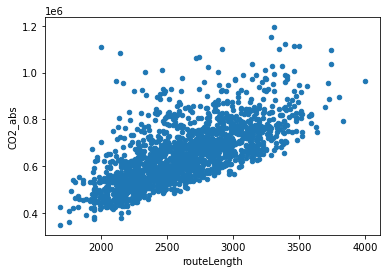

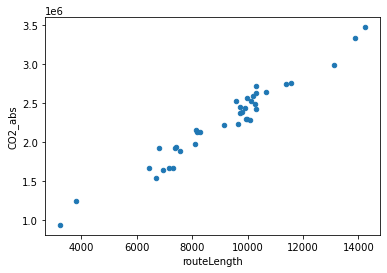

In [37]:
df.groupby("mode").plot.scatter(x="routeLength",y="CO2_abs")

In [35]:
df.groupby("mode").corr()

routeLength  customers    CO_abs   CO2_abs    HC_abs  \
mode                                                                            
private routeLength         1.000000        NaN  0.274182  0.689390  0.332744   
        customers                NaN        NaN       NaN       NaN       NaN   
        CO_abs              0.274182        NaN  1.000000  0.826392  0.997306   
        CO2_abs             0.689390        NaN  0.826392  1.000000  0.865424   
        HC_abs              0.332744        NaN  0.997306  0.865424  1.000000   
        PMx_abs             0.537961        NaN  0.873912  0.976930  0.905076   
        NOx_abs             0.639985        NaN  0.852753  0.997510  0.888670   
        fuel_abs            0.689381        NaN  0.826408  1.000000  0.865437   
        electricity_abs          NaN        NaN       NaN       NaN       NaN   
taxi    routeLength         1.000000   0.807115  0.779754  0.976414  0.846983   
        customers           0.807115   1.000000  0.670560  0.792220  0.717129   
        CO_abs              0.779754   0.670560  1.000000  0.871822  0.992708   
        CO2_abs             0.976414   0.792220  0.871822  1.000000  0.924499   
        HC_abs              0.846983   0.717129  0.992708  0.924499  1.000000   
        PMx_abs             0.946512   0.775053  0.891690  0.992585  0.938233   
        NOx_abs             0.969591   0.789851  0.880819  0.999497  0.931402   
        fuel_abs            0.976414   0.792223  0.871826  1.000000  0.924502   
        electricity_abs          NaN        NaN       NaN       NaN       NaN   

                          PMx_abs   NOx_abs  fuel_abs  electricity_abs  
mode                                                                    
private routeLength      0.537961  0.639985  0.689381              NaN  
        customers             NaN       NaN       NaN              NaN  
        CO_abs           0.873912  0.852753  0.826408              NaN  
        CO2_abs          0.976930  0.997510  1.000000              NaN  
        HC_abs           0.905076  0.888670  0.865437              NaN  
        PMx_abs          1.000000  0.988773  0.976931              NaN  
        NOx_abs          0.988773  1.000000  0.997511              NaN  
        fuel_abs         0.976931  0.997511  1.000000              NaN  
        electricity_abs       NaN       NaN       NaN              NaN  
taxi    routeLength      0.946512  0.969591  0.976414              NaN  
        customers        0.775053  0.789851  0.792223              NaN  
        CO_abs           0.891690  0.880819  0.871826              NaN  
        CO2_abs          0.992585  0.999497  1.000000              NaN  
        HC_abs           0.938233  0.931402  0.924502              NaN  
        PMx_abs          1.000000  0.995778  0.992585              NaN  
        NOx_abs          0.995778  1.000000  0.999497              NaN  
        fuel_abs         0.992585  0.999497  1.000000              NaN  
        electricity_abs       NaN       NaN       NaN              NaN

In [31]:
r2 = r2_score(df["routeLength"], df["CO2_abs"])

In [32]:
print(r2)

-460617.1416001129
